In [1]:
import os
import numpy as np
import pandas as pd
dataframe = pd.read_csv( '/home/yupaporn/codes/USAI/FVtrain_AN_RF_AN_fold7_1.csv') #เปลี่ยนไฟล์
dataframe = dataframe.drop(['Unnamed: 0'], axis=1)
dataframe

,0,1,2,3,4,5,6,7,8,9,...,2042,2043,2044,2045,2046,2047,Class,SubPosition,Views,Sub_class
0,0.047111,-0.084468,0.183206,0.106957,-0.197840,-0.146146,-0.014713,-0.039870,-0.177392,-0.150429,...,-0.054681,0.054666,-0.170043,-0.088327,-0.044075,-0.138131,Abnormal,P31,FP-B,AB01
1,-0.008152,-0.108617,0.332554,0.065598,-0.212385,-0.154046,0.185813,-0.174432,-0.162742,-0.105734,...,0.080151,0.071277,-0.140525,-0.019436,0.056166,-0.147874,Abnormal,P1,FP-A,AB01
2,0.029979,-0.104213,0.186764,0.072720,-0.206438,-0.132990,0.390629,-0.209839,-0.182634,-0.188508,...,0.067272,0.007184,-0.215518,-0.103547,-0.064773,-0.091860,Abnormal,P2,FP-A,AB01
3,0.197579,-0.117897,0.258689,0.024050,-0.209905,-0.083890,0.158171,-0.129445,-0.176343,-0.175681,...,0.002003,0.127952,-0.183598,-0.122935,0.011867,-0.153681,Abnormal,P42,FP-B,AB01
4,-0.001912,-0.121546,0.375175,0.073468,-0.217575,-0.134245,0.273981,-0.185224,-0.157108,-0.152178,...,-0.054425,0.013421,-0.169608,-0.113710,-0.100158,-0.153804,Abnormal,P41,FP-B,AB01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,0.491096,1.002230,-0.172730,-0.136594,0.595726,0.547629,-0.132018,0.425446,0.839854,0.207744,...,0.385910,-0.171571,-0.167495,0.940307,-0.085193,0.750029,Normal,P32,FP-B,Normal
4596,-0.011974,0.148026,-0.153517,0.288432,0.228395,0.791473,-0.186303,0.526963,0.464647,0.790330,...,0.025029,-0.189784,-0.117060,0.447950,-0.152273,0.707199,Normal,P42,FP-B,Normal
4597,0.272649,0.555701,-0.185605,0.503418,0.345621,1.116217,-0.118170,0.336528,0.322378,0.282140,...,0.289419,-0.125635,-0.149157,0.913193,0.212130,0.825909,Normal,P52,FP-C,Normal
4598,-0.163618,0.502226,-0.136079,-0.055631,0.857396,0.303407,-0.183531,0.703226,0.402094,0.883147,...,-0.117837,-0.189822,-0.126096,1.014838,-0.189943,0.917289,Normal,P61,FP-C,Normal


In [2]:
X = dataframe.iloc[:,0:2048]
y = dataframe.iloc[:,2048]
print(X.shape)
print(y.shape)

(4600, 2048)
(4600,)


In [3]:
y[0]


'Abnormal'

# Random Forest

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier

In [5]:
n_estimators = [400]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100] 

forest = RandomForestClassifier(random_state = 1)


hyperF ={'n_estimators' : n_estimators, 'max_depth' : max_depth, 'min_samples_split' : min_samples_split}
# hyperF ={'max_depth' : max_depth, 'min_samples_split' : min_samples_split}

gridF = GridSearchCV(forest, hyperF, cv = 10, verbose = 1, n_jobs = -1)
bestF = gridF.fit(X, y)

Fitting 10 folds for each of 25 candidates, totalling 250 fits


In [6]:
# view the results as a pandas DataFrame
import pandas as pd
pd.DataFrame(bestF.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,1.0,0.0,"{'max_depth': 5, 'min_samples_split': 2, 'n_es..."
1,1.0,0.0,"{'max_depth': 5, 'min_samples_split': 5, 'n_es..."
2,1.0,0.0,"{'max_depth': 5, 'min_samples_split': 10, 'n_e..."
3,1.0,0.0,"{'max_depth': 5, 'min_samples_split': 15, 'n_e..."
4,1.0,0.0,"{'max_depth': 5, 'min_samples_split': 100, 'n_..."
5,1.0,0.0,"{'max_depth': 8, 'min_samples_split': 2, 'n_es..."
6,1.0,0.0,"{'max_depth': 8, 'min_samples_split': 5, 'n_es..."
7,1.0,0.0,"{'max_depth': 8, 'min_samples_split': 10, 'n_e..."
8,1.0,0.0,"{'max_depth': 8, 'min_samples_split': 15, 'n_e..."
9,1.0,0.0,"{'max_depth': 8, 'min_samples_split': 100, 'n_..."


In [7]:
# examine the first result
print("**examine the first result","\n")

print(bestF.cv_results_['params'][0])
print(bestF.cv_results_['mean_test_score'][0])

# print the array of mean scores only
print("\n","**print the array of mean scores only","\n")

grid_mean_scores = bestF.cv_results_['mean_test_score']
print(grid_mean_scores)

# examine the best model
print("\n","**examine the best model","\n")

print(bestF.best_score_)
print(bestF.best_params_)
print(bestF.best_estimator_)

**examine the first result 

{'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 400}
1.0

 **print the array of mean scores only 

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1.]

 **examine the best model 

1.0
{'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 400}
RandomForestClassifier(max_depth=5, n_estimators=400, random_state=1)


In [8]:
#Print the tured parameters and score
print("Tuned Decision Tree Parameters: {}".format(bestF.best_params_))
print("Best score is {}".format(bestF.best_score_))

Tuned Decision Tree Parameters: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 400}
Best score is 1.0


# setting parameters

In [9]:
forestOpt = RandomForestClassifier(random_state = 1, max_depth = 5, n_estimators = 400, min_samples_split = 2) #เปลี่ยนตาม cell 8
             
modelOpt = forestOpt.fit(X, y)# 

In [10]:
dataframe = pd.read_csv( '/home/yupaporn/codes/USAI/FVvalidation_AN_RF_AN_fold7_1.csv') #เปลี่ยนชื่อไฟล์ Validation

In [11]:
X_test = dataframe.iloc[:,1:2049]
y_test = dataframe.iloc[:,2049]
print(X_test.shape)
print(y_test.shape)

(657, 2048)
(657,)


In [12]:
y_test

0      Abnormal
1      Abnormal
2      Abnormal
3      Abnormal
4      Abnormal
         ...   
652      Normal
653      Normal
654      Normal
655      Normal
656      Normal
Name: Class, Length: 657, dtype: object

In [13]:
y_pred = modelOpt.predict(X_test)

In [14]:
#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))#performance

[[198  30]
 [ 20 409]]
              precision    recall  f1-score   support

    Abnormal       0.91      0.87      0.89       228
      Normal       0.93      0.95      0.94       429

    accuracy                           0.92       657
   macro avg       0.92      0.91      0.92       657
weighted avg       0.92      0.92      0.92       657



Text(0.5, 21.5, 'Predicted label')

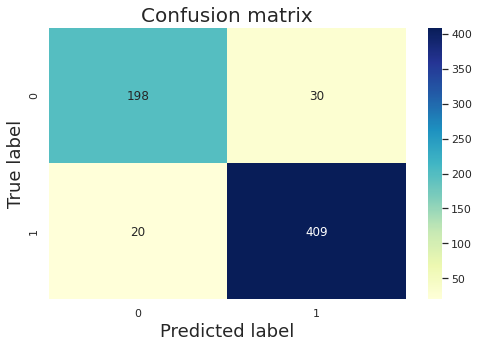

In [15]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)

import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(8, 5))

ax = sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

In [16]:
TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()
print(TN, FP, FN, TP)

198 30 20 409


# Save Model

In [17]:
#Save Model

import pickle
os.chdir('/media/tohn/SSD/ModelTrainByImages/R2_7/models/')
filename = "modelrf_AN_AN_fold7_1.pkl" #เปลี่ยนชื่อไฟล์ Train random forest
with open(filename, 'wb') as file:
    pickle.dump(modelOpt, file)

In [ ]:
# #load model

# with open(filename, 'rb') as file:
#     model = pickle.load(file)